In [78]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [79]:
# reading the data
df =pd.read_csv("Heart_data.csv")
df.head()

,age,sex,cp,trestbps,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [80]:
df.describe()

,age,sex,cp,trestbps,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,target
count,597.000000,597.000000,597.000000,596.000000,574.000000,589.000000,596.000000,596.000000,596.000000,597.000000,407.000000,303.000000,329.000000,597.000000
mean,51.182580,0.701843,3.072027,132.129195,248.655052,0.110357,0.610738,144.456376,0.315436,0.816248,1.675676,0.693069,4.811550,0.410385
std,9.074366,0.457833,0.965776,17.603812,59.784805,0.313600,0.869358,23.794282,0.465080,1.067938,0.572758,1.049212,1.928854,0.492316
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,44.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,128.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,52.000000,1.000000,3.000000,130.000000,242.500000,0.000000,0.000000,146.000000,0.000000,0.200000,2.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,4.000000,140.000000,278.750000,0.000000,2.000000,162.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,1.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   597 non-null    int64  
 1   sex                   597 non-null    int64  
 2   cp                    597 non-null    int64  
 3   trestbps              596 non-null    float64
 4   cholestoral           574 non-null    float64
 5   blood sugar           589 non-null    float64
 6   electrocardiographic  596 non-null    float64
 7   heart rate            596 non-null    float64
 8   exercise induced      596 non-null    float64
 9   depression            597 non-null    float64
 10  slope                 407 non-null    float64
 11  ca                    303 non-null    float64
 12  thal                  329 non-null    float64
 13  target                597 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 65.4 KB


In [82]:
df.groupby('cp',as_index=True)['target'].mean()

cp
1    0.323529
2    0.108974
3    0.207143
4    0.704120
Name: target, dtype: float64

In [83]:
df.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,1.0,0.233766
1,2.0,0.705628
2,3.0,0.590909


In [84]:
df.groupby('thal',as_index=False)['target'].mean()

,thal,target
0,3.0,0.213873
1,6.0,0.642857
2,7.0,0.750000


In [85]:
df.groupby('target').mean()

,age,sex,cp,trestbps,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal
target,,,,,,,,,,,,,
0,49.545455,0.599432,2.698864,130.039886,241.272455,0.086705,0.511364,151.253561,0.119658,0.387784,1.441026,0.323171,3.887640
1,53.534694,0.848980,3.608163,135.122449,258.929167,0.144033,0.754098,134.718367,0.595918,1.431837,1.891509,1.129496,5.900662


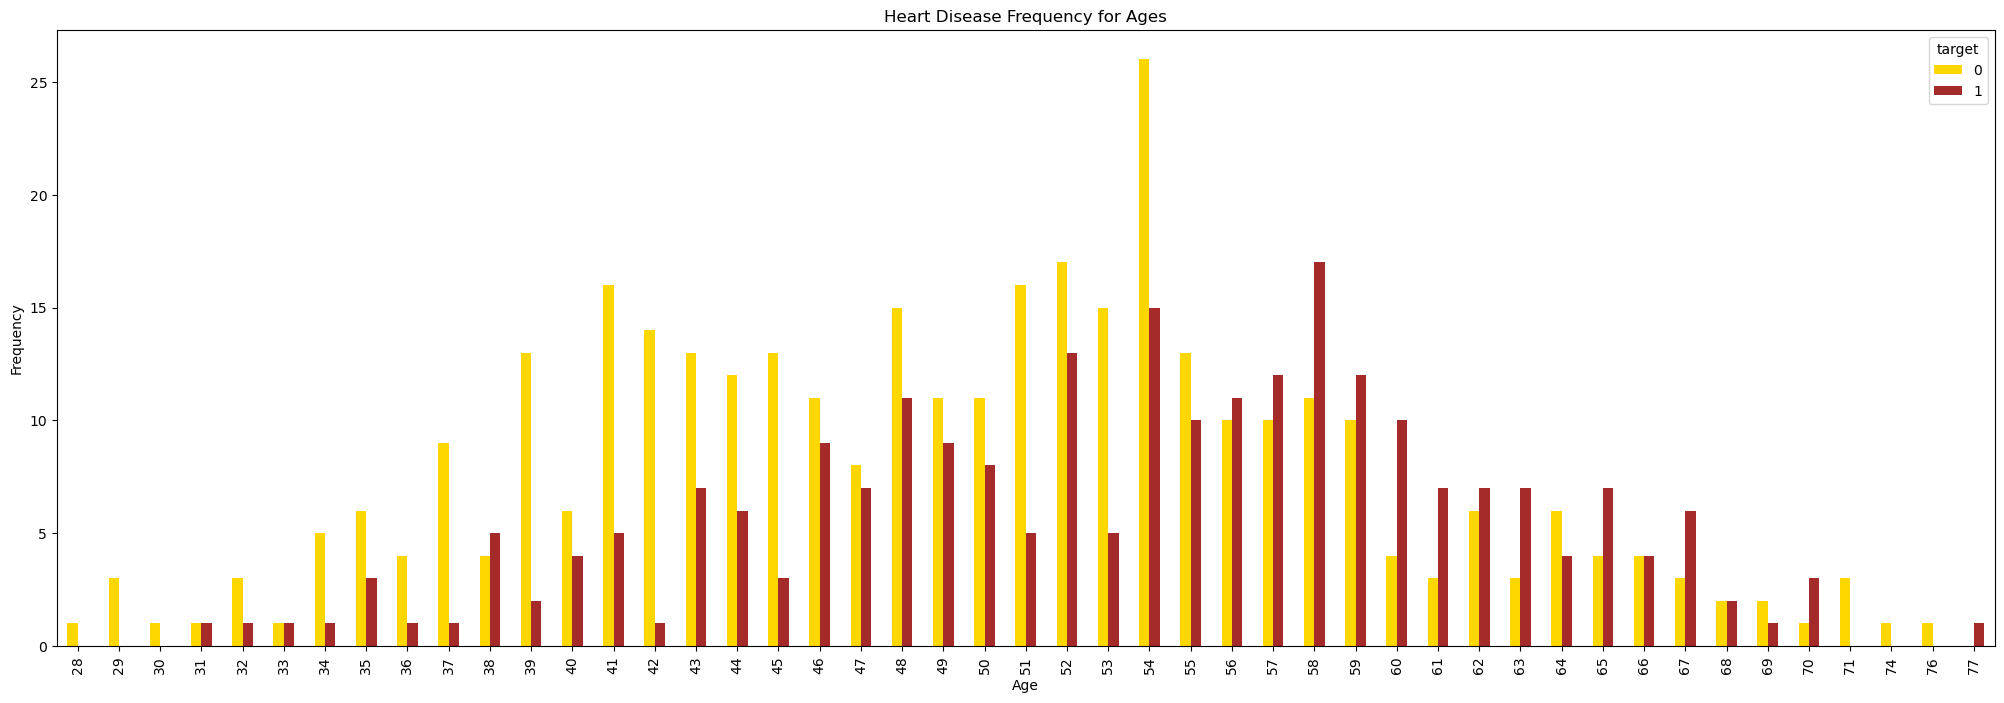

In [86]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

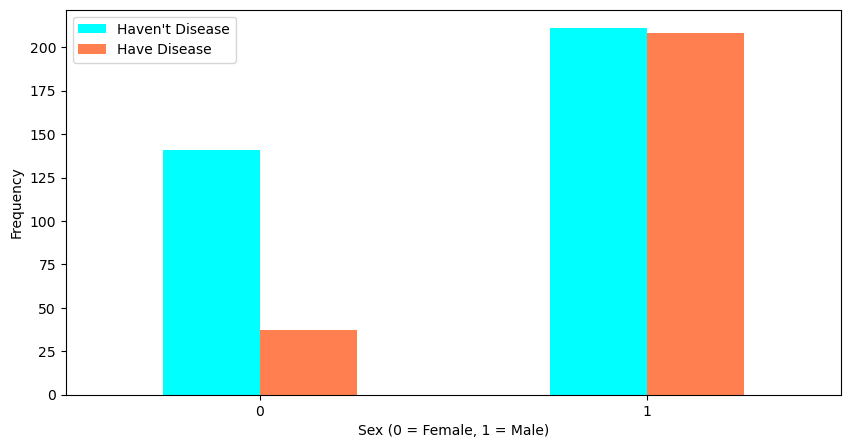

In [87]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of blood pressure with target')

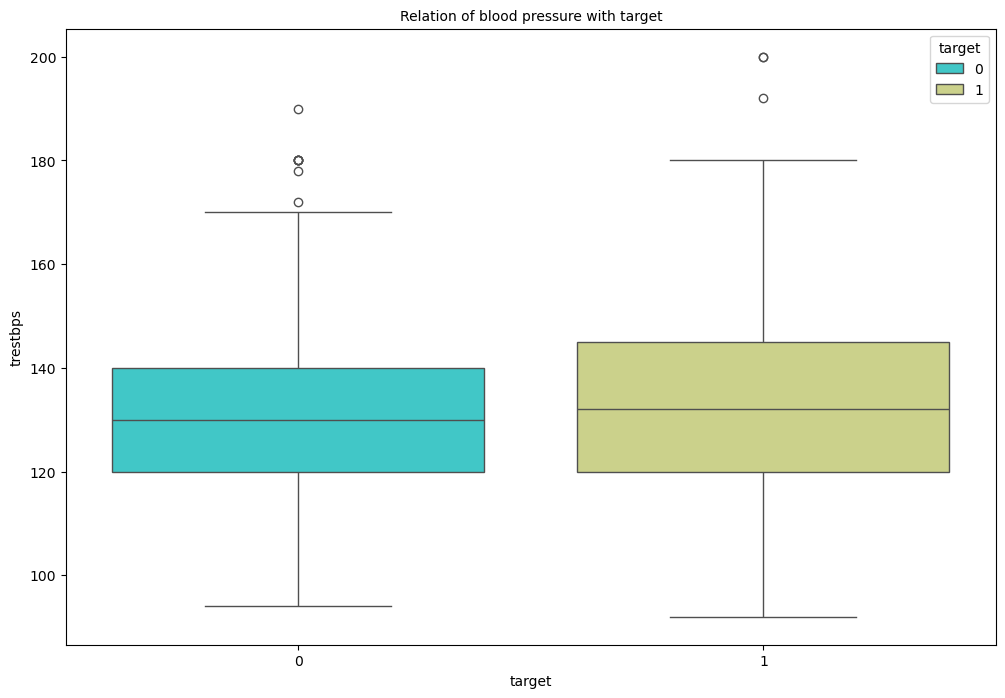

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['target'], y=df['trestbps'], hue=df['target'], palette = 'rainbow')
plt.title('Relation of blood pressure with target', fontsize = 10)

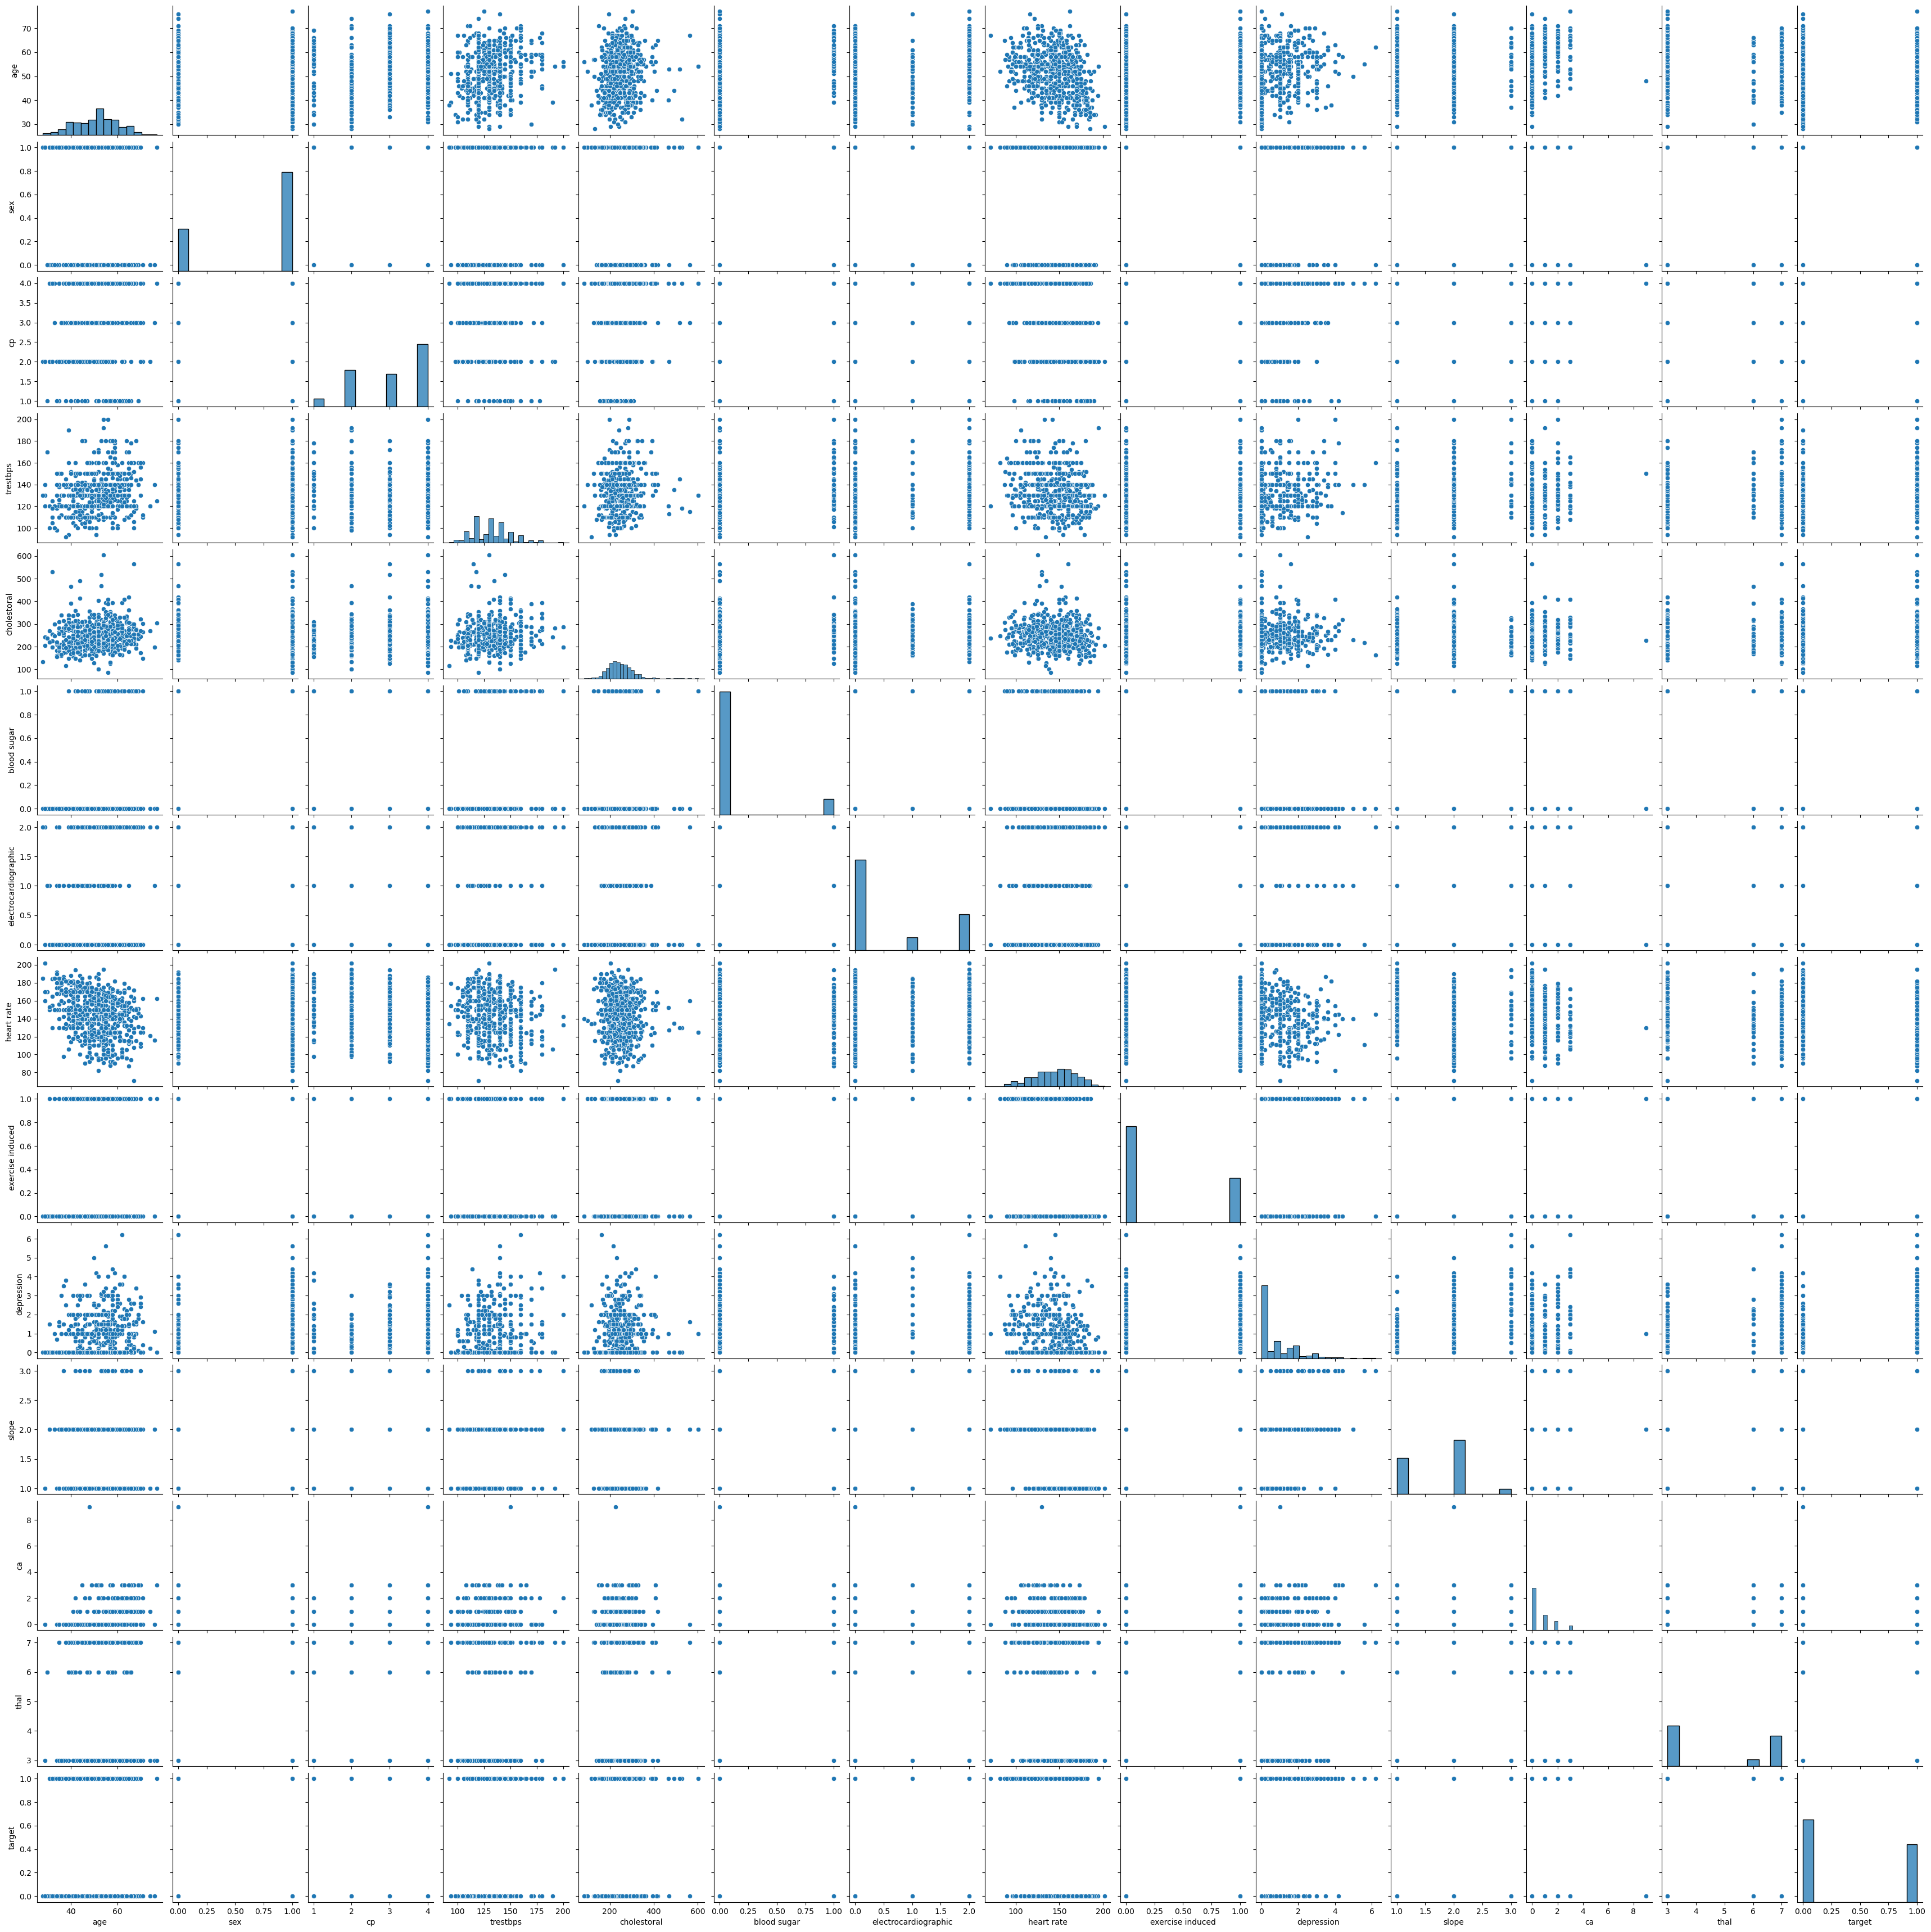

In [89]:
sns.pairplot(data=df)

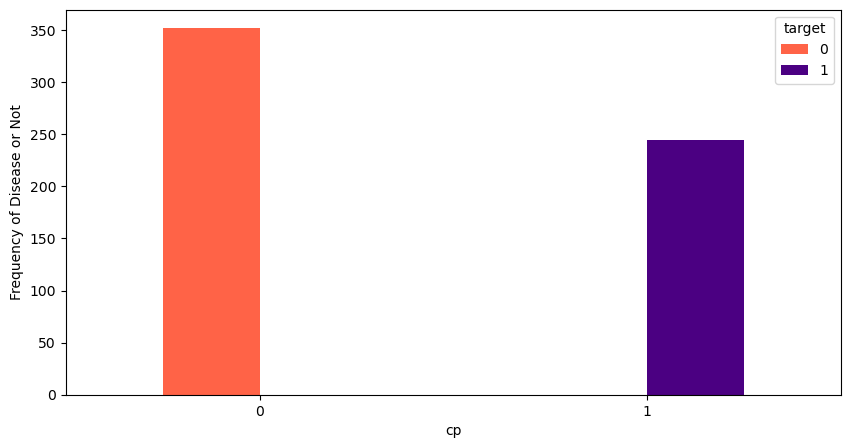

In [90]:
pd.crosstab(df.target,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('cp')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Effect of parameters on Heart Disease based on Age

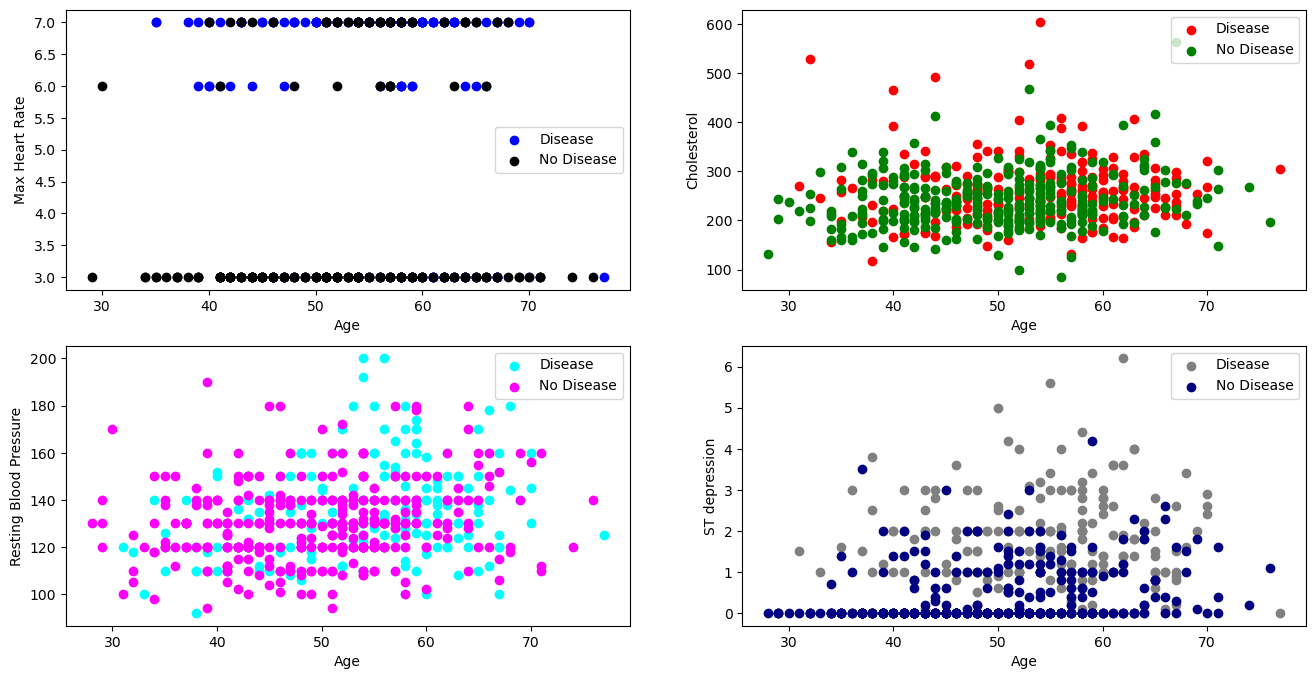

In [91]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

plt.scatter(x=df.age[df.target==1],y=df.thal[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thal[df.target==0],c='black')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.cholestoral[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.cholestoral[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.depression[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.depression[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

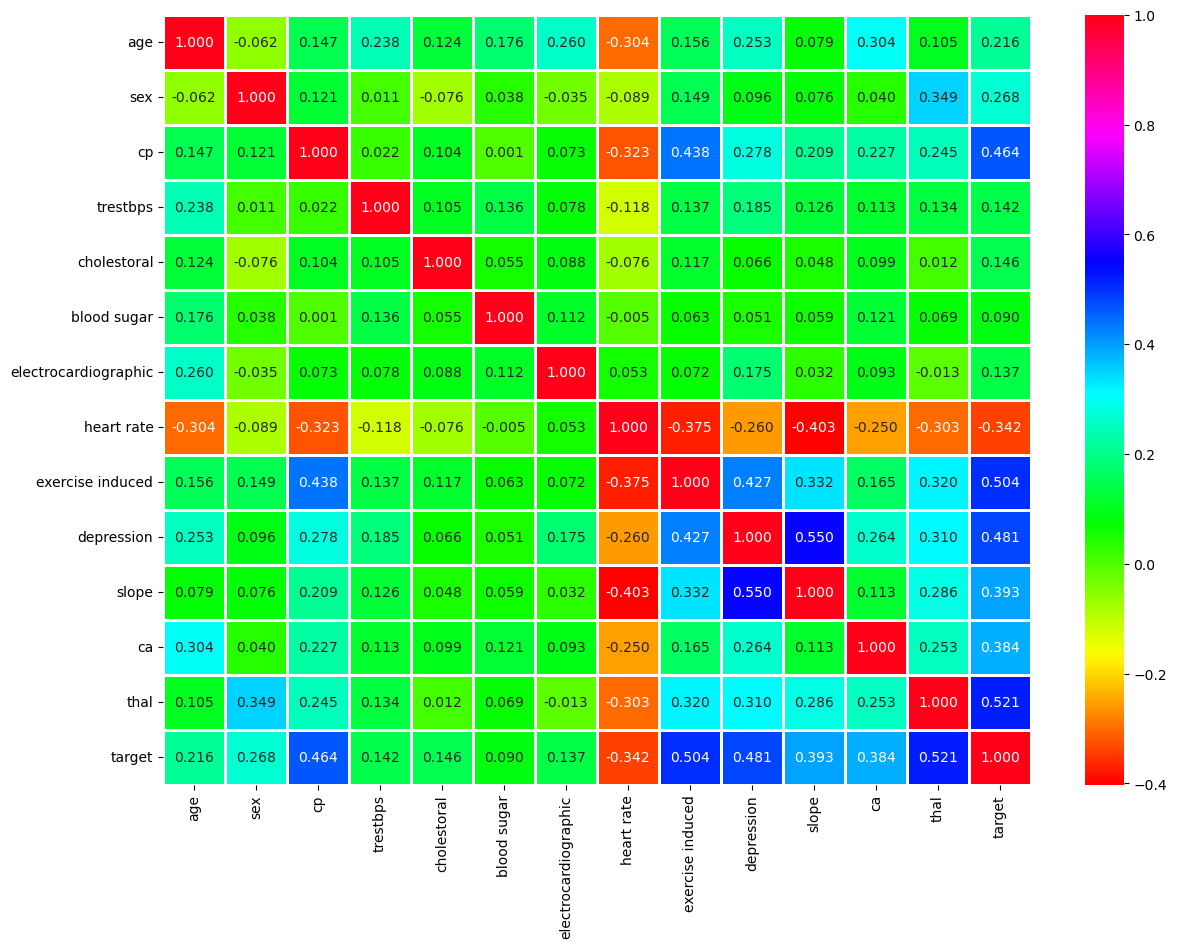

In [92]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()